In [1]:
def get_unique_values(keys, target_key, datatype = float):
    unique_c_values = set()  

    for key in keys:
        if not (target_key + "=") in key:
            continue
        key_value_pairs = key.split(", ")
        for pair in key_value_pairs:
            k, v = pair.split("=") 
            if k == target_key:
                unique_c_values.add(datatype(v))

    unique_c_values_list = sorted(list(unique_c_values))

    return unique_c_values_list

def get_param_value(filename, target_key, value_type = float):
    unique_c_values = set()

    l = filename.split("_")
    
    tmp = l[l.index(target_key) + 1]
    if ".json" in tmp:
        val = value_type(tmp[:-5])
    else:
        val = value_type(tmp)

    return val

In [2]:
import json, glob
gate_type = "haar"
error_type = "pauli"

n_data = 10000
eps = 1e-4
load_each_J = True

cmax=5

sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
print(fname_list)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(ndata_candidates)
print(f"your choice: {n_data}")

if load_each_J:
    if cmax is not None:
        sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*_cmax_{cmax}.json"
        fname_list = glob.glob(sname)
    else:
        sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
        fname_list = [f for f in glob.glob(sname) if "cmax" not in f]
    
    print()
    for f in fname_list:
        print(f)
    
    J_list = [get_param_value(_f, "J", int) for _f in fname_list]
    print("\ncandidates for ndata:")
    data = {}
    for J, filename in zip(J_list, fname_list):
        key = f"{J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]
        c_list = get_unique_values(nondiag_l1_data.keys(), "c")
    
else:
    filename = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}.json"

    data = json.load(open(filename, "r"))

    nondiag_l1_data = data["nondiag_l1_data"]
    dnorm_data = data["dnorm_data"]
    c_list = get_unique_values(nondiag_l1_data.keys(), "c")
    eps_list = get_unique_values(nondiag_l1_data.keys(), "eps")

print(f"\n{c_list=}")
print(f"{J_list=}")
#print(f"{eps_list=}")

['../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_10_c_0.3.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_7_c_0.3.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_6_c_1.2.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_9_c_2.1.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_8_c_3.0.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_6_c_0.6.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_8_c_2.4.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_5_c_0.9.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_4_c_1.8.json', '../results/success_rate/success_rate_haar_pauli_ndata_200_cfilled_eps_1.00e-04_J_6_c_2.7.json', '../results/success_rate/suc

In [3]:
J=3
filename = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_{J}.json"
key = f"{J=}"
data[key] = json.load(open(filename, "r"))

J=4
filename = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_{J}.json"
key = f"{J=}"
data[key] = json.load(open(filename, "r"))

/var/folders/xw/hgtg8nx922g7smt8_4th3hxc0000gn/T/ipykernel_74626/4052677627.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Blues")


(5e-05, 1.2)

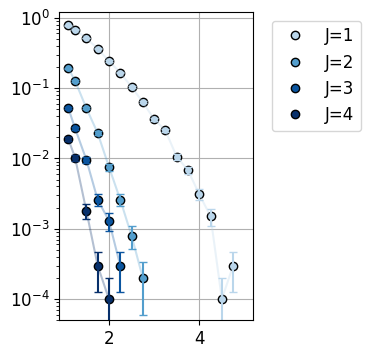

In [5]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 12
cmap = get_cmap("Blues")
fig = plt.figure(figsize = (2.5, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
#J_list_disp = [4, 3, 2, 1]
J_list_disp = [1, 2, 3, 4]
for ii, J in enumerate(J_list_disp):
    color = cmap((ii+1)/(len(J_list_disp)-0.5))
    try:
        if load_each_J:
            kkey = f"{J=}"
            success = []
            success_std = []
            #nondiag_l1_std = []
            
            nondiag_l1_data = data[kkey]["nondiag_l1_data"]
            dnorm_data = data[kkey]["dnorm_data"]
            c_list = get_unique_values(nondiag_l1_data.keys(), "c")
            
            for c in c_list:
                key = f"eps={eps:.2e}, J={J}, {c=}"

                arr = [_nondiag_l1 <= min([threshold, eps**2 * c]) and _dnorm/2 <= eps**2 * ((c+1)**2) for (_nondiag_l1, _dnorm) in zip(nondiag_l1_data[key], dnorm_data[key])]
                rate = np.mean(arr)
                std = np.std(arr) / np.sqrt(len(arr)-1)
                
                if np.NaN in success:
                    success.append(np.NaN)
                    success_std.append(np.NaN)
                else:
                    if rate !=1:
                        success.append(rate)
                        success_std.append(std)
                    else:
                        success.append(np.NaN)
                        success_std.append(np.NaN)

            plt.plot(c_list, 1-np.array(success), "o", label = f"{J=}", color = color, markeredgecolor = "black")
            plt.plot(c_list, 1-np.array(success), "-", color = color, alpha = 0.3)
            plt.errorbar(c_list, 1-np.array(success), yerr = success_std, color = color, capsize = 3, linestyle = "none", markeredgecolor = "black") 
        else:

            success = []
            success_std = []
            for c in c_list:
                key = f"eps={eps:.2e}, J={J}, {c=}"

                arr = np.array(nondiag_l1_data[key]) <= min([threshold, eps**2 * c])
                rate = np.mean(arr)
                std = np.std(arr) / np.sqrt(len(arr)-1)
                
                if np.NaN in success:
                    success.append(np.NaN)
                    success_std.append(np.NaN)
                else:
                    if rate !=1:
                        success.append(rate)
                        success_std.append(std)
                    else:
                        success.append(np.NaN)
                        success_std.append(np.NaN)

            plt.plot(c_list, 1-np.array(success), "o", label = f"R={J}", color = color)
            plt.plot(c_list, 1-np.array(success), "-", color = color, alpha = 0.3)
            plt.errorbar(c_list, 1-np.array(success), yerr = success_std, color = color, capsize = 3, linestyle = "none")
    except Exception as e:
        print(e)
        print(f"{J=} not found?")

plt.yscale("log")
plt.legend(bbox_to_anchor = (1.6, 1))
plt.grid()
plt.ylim(ymin = 0.05e-3, ymax = 1.2)